In [1]:
import pandas as pd #for working with datasets
import numpy as np  #for working with numerical data
import seaborn as sns; sns.set() #for plotting nice graphic plots

In [2]:
#read raw csv data from file and consider the ts_start cloumn as a datetime column
#cdr_raw would be our dataset which is a Pandas object (dataframe)
cdr_raw = pd.read_csv('sample_cdr.csv', parse_dates=['ts_start'])
#The type of the object
print(type(cdr_raw))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#we represent some records from start of the file
cdr_raw.head()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13


In [4]:
#we represent some records from end of the file
cdr_raw.tail()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start
374,99999999999,PI016U2,PI016U2,148,2012-11-09 13:46:49
375,99999999999,PI016G2,PI016G2,48,2012-11-09 14:39:04
376,99999999999,PI016U2,PI016U2,898,2012-11-09 14:43:26
377,99999999999,PI016U2,PI016U2,848,2012-11-09 14:58:48
378,99999999999,PI016U2,PI016U2,5,2012-11-09 22:58:26


In [5]:
#to build our matrix we need to add two other columns to the data (weekday and hour in week), like the exam of VA.
#getting the weekday is easy, just check this for our cdr_raw:     cdr_raw["ts_start"].dt.weekday
#or this cdr_raw["ts_start"].dt.hour
cdr_raw['weekday'] = cdr_raw['ts_start'].apply(lambda x: x.weekday())
cdr_raw['hour'] = cdr_raw['ts_start'].apply(lambda x: x.hour)

In [6]:
#Again, we represent some records from start of the file. Now the two columns are added
cdr_raw.head()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start,weekday,hour
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29,1,10
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56,1,15
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18,1,21
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56,1,22
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13,1,22


In [7]:
#We can get a description of our data based on each column
cdr_raw.describe()

,id_chiamante,durata,weekday,hour
count,3.790000e+02,379.000000,379.000000,379.000000
mean,1.000000e+11,285.912929,2.271768,15.298153
std,0.000000e+00,396.100356,1.589489,4.923572
min,1.000000e+11,1.000000,0.000000,0.000000
25%,1.000000e+11,31.000000,1.000000,10.000000
50%,1.000000e+11,114.000000,2.000000,16.000000
75%,1.000000e+11,364.000000,4.000000,20.000000
max,1.000000e+11,1927.000000,6.000000,23.000000


In [8]:
#How many unique users are there in our dataset?
len(cdr_raw.id_chiamante.unique())

1

In [9]:
#How many unique start cells are there in our dataset?
len(cdr_raw.id_cella_start.unique())

27

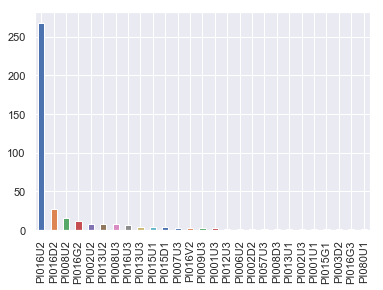

In [10]:
#Histogram of data for each start cell
cdr_raw['id_cella_start'].value_counts().plot(kind='bar')

In [11]:
#How many unique end cells are there in our dataset?
len(cdr_raw.id_cella_end.unique())

35

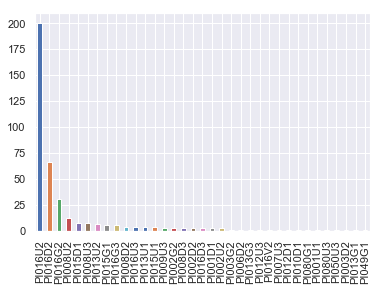

In [12]:
#Histogram of data for each end cell
cdr_raw['id_cella_end'].value_counts().plot(kind='bar')

In [13]:
#Now we want to build another data frame from our cdr_raw and call it cdr_matrix
#Using pivot_table
cdr_matrix = cdr_raw.pivot_table(index=cdr_raw["hour"],columns=cdr_raw["weekday"],aggfunc=len)

In [14]:
#The table is indexed based on "hour" and columned on weekdays (namely 0,1,2,3,4,5,6) and
#aggregated based on len, which means we get the length of each dimension. Actually, it means we get the count
#The aggregated data are for each of the columns of cdr_raw and are duplicate
cdr_matrix

durata                                   id_cella_end              \
weekday      0     1     2     3     4    5    6            0     1     2   
hour                                                                        
0          NaN   NaN   1.0   NaN   1.0  NaN  NaN          NaN   NaN   1.0   
1          NaN   NaN   1.0   NaN   NaN  NaN  NaN          NaN   NaN   1.0   
6          NaN   NaN   1.0   NaN   NaN  NaN  NaN          NaN   NaN   1.0   
7          NaN   NaN   4.0   1.0   1.0  NaN  NaN          NaN   NaN   4.0   
8          NaN   2.0   3.0   1.0   9.0  NaN  NaN          NaN   2.0   3.0   
9          9.0   4.0   7.0   5.0   8.0  2.0  2.0          9.0   4.0   7.0   
10         5.0   8.0  18.0   1.0   1.0  NaN  2.0          5.0   8.0  18.0   
11         1.0   NaN   3.0   1.0   1.0  1.0  1.0          1.0   NaN   3.0   
12         NaN   3.0   NaN   NaN   NaN  NaN  1.0          NaN   3.0   NaN   
13         7.0   8.0  10.0   1.0  13.0  1.0  1.0          7.0   8.0  10.0   
14         NaN   5.0   4.0   2.0  11.0  1.0  NaN          NaN   5.0   4.0   
15         2.0   2.0   4.0   6.0   2.0  NaN  NaN          2.0   2.0   4.0   
16         6.0   3.0   1.0   3.0   5.0  3.0  2.0          6.0   3.0   1.0   
17         4.0   1.0   4.0   2.0  12.0  NaN  NaN          4.0   1.0   4.0   
18         3.0   4.0   7.0   1.0   7.0  NaN  NaN          3.0   4.0   7.0   
19         NaN   NaN   2.0   4.0   3.0  NaN  NaN          NaN   NaN   2.0   
20         1.0  15.0   2.0   3.0   1.0  3.0  1.0          1.0  15.0   2.0   
21        12.0  13.0  10.0  11.0   2.0  NaN  1.0         12.0  13.0  10.0   
22         5.0  11.0   6.0   7.0   1.0  3.0  1.0          5.0  11.0   6.0   
23         1.0   1.0   2.0   NaN   NaN  NaN  NaN          1.0   1.0   2.0   

        ...  id_chiamante           ts_start                                    
weekday ...             4    5    6        0     1     2     3     4    5    6  
hour    ...                                                                     
0       ...           1.0  NaN  NaN      NaN   NaN   1.0   NaN   1.0  NaN  NaN  
1       ...           NaN  NaN  NaN      NaN   NaN   1.0   NaN   NaN  NaN  NaN  
6       ...           NaN  NaN  NaN      NaN   NaN   1.0   NaN   NaN  NaN  NaN  
7       ...           1.0  NaN  NaN      NaN   NaN   4.0   1.0   1.0  NaN  NaN  
8       ...           9.0  NaN  NaN      NaN   2.0   3.0   1.0   9.0  NaN  NaN  
9       ...           8.0  2.0  2.0      9.0   4.0   7.0   5.0   8.0  2.0  2.0  
10      ...           1.0  NaN  2.0      5.0   8.0  18.0   1.0   1.0  NaN  2.0  
11      ...           1.0  1.0  1.0      1.0   NaN   3.0   1.0   1.0  1.0  1.0  
12      ...           NaN  NaN  1.0      NaN   3.0   NaN   NaN   NaN  NaN  1.0  
13      ...          13.0  1.0  1.0      7.0   8.0  10.0   1.0  13.0  1.0  1.0  
14      ...          11.0  1.0  NaN      NaN   5.0   4.0   2.0  11.0  1.0  NaN  
15      ...           2.0  NaN  NaN      2.0   2.0   4.0   6.0   2.0  NaN  NaN  
16      ...           5.0  3.0  2.0      6.0   3.0   1.0   3.0   5.0  3.0  2.0  
17      ...          12.0  NaN  NaN      4.0   1.0   4.0   2.0  12.0  NaN  NaN  
18      ...           7.0  NaN  NaN      3.0   4.0   7.0   1.0   7.0  NaN  NaN  
19      ...           3.0  NaN  NaN      NaN   NaN   2.0   4.0   3.0  NaN  NaN  
20      ...           1.0  3.0  1.0      1.0  15.0   2.0   3.0   1.0  3.0  1.0  
21      ...           2.0  NaN  1.0     12.0  13.0  10.0  11.0   2.0  NaN  1.0  
22      ...           1.0  3.0  1.0      5.0  11.0   6.0   7.0   1.0  3.0  1.0  
23      ...           NaN  NaN  NaN      1.0   1.0   2.0   NaN   NaN  NaN  NaN  

[20 rows x 35 columns]

In [15]:
#To remove duplicates, we select just one column. We can choose any column
cdr_matrix = cdr_matrix["durata"]

In [16]:
#Now, this is the matrix and we want to draw heatmap for this.
#This matrix is the heatmap of all weeks, not week by week like the paper. Getting for every week is straightforward.
cdr_matrix

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,NaN,NaN,4.0,1.0,1.0,NaN,NaN
8,NaN,2.0,3.0,1.0,9.0,NaN,NaN
9,9.0,4.0,7.0,5.0,8.0,2.0,2.0
10,5.0,8.0,18.0,1.0,1.0,NaN,2.0
11,1.0,NaN,3.0,1.0,1.0,1.0,1.0
12,NaN,3.0,NaN,NaN,NaN,NaN,1.0


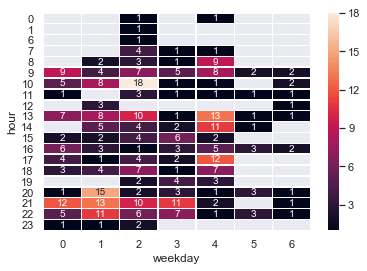

In [17]:
#Now, draw heatmap using sns
#more infor on : https://seaborn.pydata.org/generated/seaborn.heatmap.html
ax = sns.heatmap(cdr_matrix, annot=True, linewidths=.5, xticklabels=1, yticklabels=1)